**Steps to Check for Stationarity:**

**Stationary:** A stationary series has constant mean, variance, and autocovariance over time.

**Non-stationary:** A non-stationary series may have trends, seasonality, or changing variance over time.

- The Augmented Dickey-Fuller (ADF) test helps us check if a time series is stationary or if it has a unit root (non-stationary).

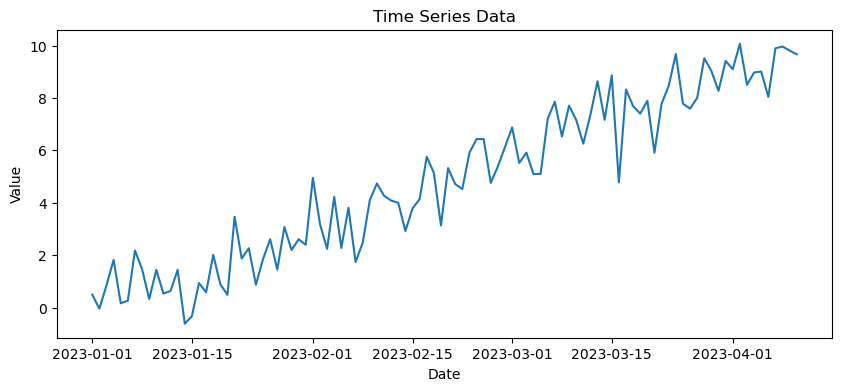

ADF Statistic: -0.15026113477284184
p-value: 0.9441964694670332
Critical Values:
	1%: -3.5011373281819504
	5%: -2.8924800524857854
	10%: -2.5832749307479226

The time series is likely non-stationary (fail to reject null hypothesis)


In [1]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

# Step 1: Create synthetic data (for example purposes)
# Simulating a non-stationary time series with a trend
np.random.seed(42)
dates = pd.date_range(start='2023-01-01', periods=100, freq='D')
values = np.random.randn(100) + np.arange(100) * 0.1  # Trend + random noise
data = pd.Series(values, index=dates)

# Step 2: Plot the time series
plt.figure(figsize=(10, 4))
plt.plot(data)
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

# Step 3: Perform the Augmented Dickey-Fuller (ADF) test
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value}')
    
    # Conclusion
    if result[1] < 0.05:
        print("\nThe time series is likely stationary (reject null hypothesis)")
    else:
        print("\nThe time series is likely non-stationary (fail to reject null hypothesis)")

# Step 4: Run the ADF test
adf_test(data)


**How to Handle Non-Stationary Data:**
    
- If the time series is non-stationary, you can:

**Differencing:** Apply differencing to remove trends and make the series stationary

In [2]:
data_diff = data.diff().dropna()
adf_test(data_diff)


ADF Statistic: -5.194567863079864
p-value: 9.019393985742691e-06
Critical Values:
	1%: -3.506057133647011
	5%: -2.8946066061911946
	10%: -2.5844100201994697

The time series is likely stationary (reject null hypothesis)


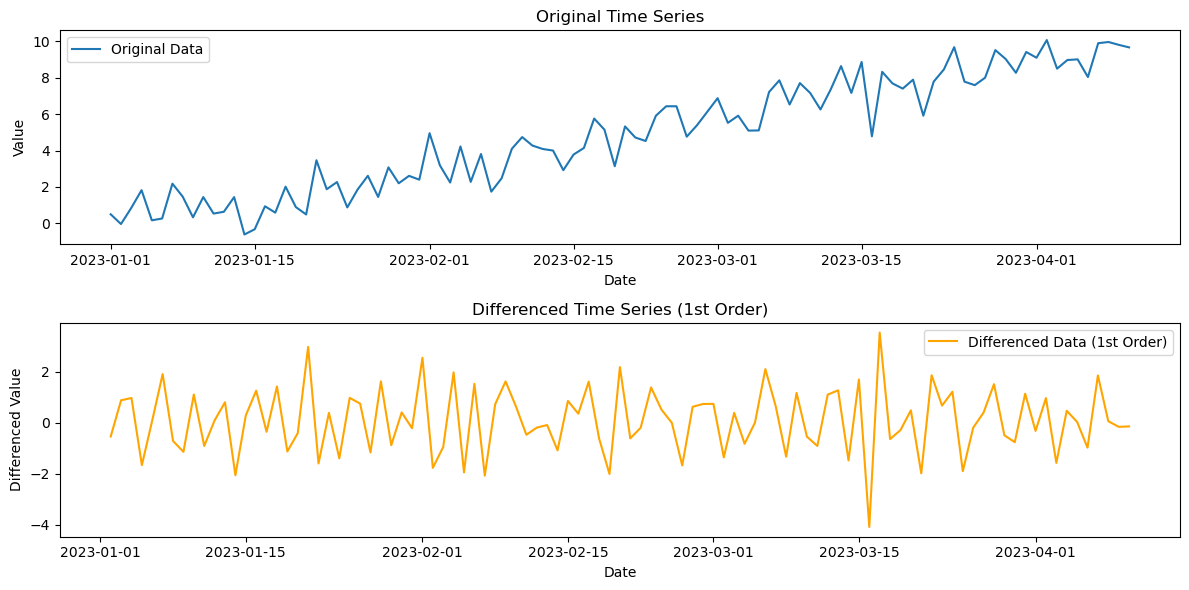

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Create synthetic non-stationary time series data
np.random.seed(42)
dates = pd.date_range(start='2023-01-01', periods=100, freq='D')
values = np.random.randn(100) + np.arange(100) * 0.1  # Trend + random noise
data = pd.Series(values, index=dates)

# Step 2: Difference the data (first order differencing)
data_diff = data.diff().dropna()  # .dropna() removes the first NaN after differencing

# Step 3: Plot the original data
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(data, label='Original Data')
plt.title('Original Time Series')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()

# Step 4: Plot the differenced data
plt.subplot(2, 1, 2)
plt.plot(data_diff, label='Differenced Data (1st Order)', color='orange')
plt.title('Differenced Time Series (1st Order)')
plt.xlabel('Date')
plt.ylabel('Differenced Value')
plt.legend()

plt.tight_layout()
plt.show()
